<a href="https://colab.research.google.com/github/Fonseca-BrunoC/Teste/blob/main/Curva_de_calibra%C3%A7%C3%A3o_com_m%C3%A9dia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
#Importando dados
df = pd.read_csv("/content/data2.csv") 
print(df)
data = df.to_numpy() #transformando os dados em numpy
#Fazendo as médias das abs

M1 = np.mean(data[0,:3])
M2 = np.mean(data[1,:3])
M3 = np.mean(data[2,:3])
M4 = np.mean(data[3,:3])
M5 = np.mean(data[4,:3])
#Criando uma coluna para as médias
AbsM = np.array([[M1], [M2], [M3], [M4], [M5]])
AbsM = AbsM.round(3) #diminuindo as casas decimais

#criando nova matriz para as médias e a cocnetração
dataa = np.array([[data[0,3]], [data[1,3]], [data[2,3]], [data[3,3]], [data[4,3]]])
data2 = np.append(AbsM, dataa, axis = 1)
print(data2)

y = data2[:,0]
x = data2[:,1]

     Abs   Abs 2   Abs3   C(mg/L)
0  0.000   0.000  0.000         0
1  0.315   0.322  0.341       200
2  0.605   0.631  0.610       400
3  0.920   0.915  0.923       600
4  1.245   1.228  1.235       800
[[0.000e+00 0.000e+00]
 [3.260e-01 2.000e+02]
 [6.150e-01 4.000e+02]
 [9.190e-01 6.000e+02]
 [1.236e+00 8.000e+02]]


In [41]:
#Definindo o coeficiente angular
def coef_ang(dy, dx):
  a = dy / dx 
  return a

#Definindo o coeficiente linear
def coef_lin(y1, x1, m):
  b = y1 - (m * x1) 
  return b

In [42]:
#Modelando a equação da reta
def eq_reta(X, show):
  dy = y[-1] - y[0] #determinando dy como a variação de y 
  dx = x[-1] - x[0] #determinando dx como a variação de x
  m = coef_ang(dy,dx)

  y1 = y[1] #utilizando o segundo ponto da reta para achar o coeficiente linear
  x1 = x[1] 
  n = coef_lin(y1, x1, m)

  Y = (m * X) + n # eq da reta

  if show == True:  
    return print(f"y = {m:.5f}x + ({n:.5f})") #Para show == True a função mostra somente a equação da reta
  else:
    return Y #Para show == False a função retorna os valores de y para um x em específico

In [43]:
#mostrando a eq da reta
X = x
show = True
eq_reta(X, show)

y = 0.00154x + (0.01700)


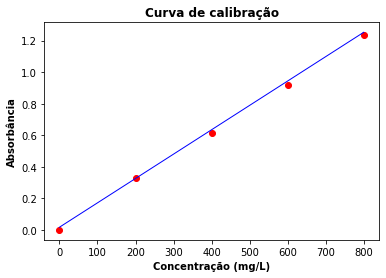

In [44]:
#Plotando a reta
show = False
fx = eq_reta(X, show) #funçao y
plt.plot(x,y,"r-", marker ='o', linestyle = '')
plt.plot(x,fx, "b-", linewidth=1) 
plt.title("Curva de calibração", weight='bold')
plt.xlabel("Concentração (mg/L)", weight='bold')
plt.ylabel("Absorbância", weight='bold')
plt.show()